#Nidhi Vanjare 
###Task 3 - Exploratory Data Analysis - Retail Store

In [ ]:
pip install mplcursors

In [ ]:
import pandas as pd
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplcursors
# matplotlib.use('nbAgg' , warn = False , force = True)
# plt.rcParams.update({'figure.max_open_warning': 0})
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SampleSuperstore.csv')

df


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


Drop unwanted columns

In [ ]:
df=df.drop(columns=['Ship Mode','Country','Postal Code','Segment'])
df.head()

,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          9994 non-null   object 
 1   State         9994 non-null   object 
 2   Region        9994 non-null   object 
 3   Category      9994 non-null   object 
 4   Sub-Category  9994 non-null   object 
 5   Sales         9994 non-null   float64
 6   Quantity      9994 non-null   int64  
 7   Discount      9994 non-null   float64
 8   Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 702.8+ KB


In [ ]:
sales_df = df.groupby('Category', as_index=False)['Sales'].sum()
subcat_df = df.groupby(['Category','Sub-Category'])['Sales'].sum()
subcat_df['Sales']=map(int,subcat_df)
sales_df


,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


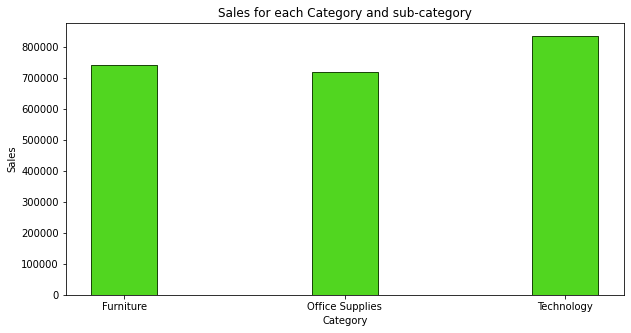

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))
ax.bar(sales_df['Category'],sales_df['Sales'],color='#51d620',edgecolor='#1b470a',width=0.3) 
ax.set_title(label="Sales for each Category and sub-category", loc='center', pad=None)
ax.set_ylabel('Sales')
ax.set_xlabel('Category')
crs=mplcursors.cursor(ax,hover=True)
@crs.connect("add")
def on_add(sel):
    x, y, width, height = sel.artist[sel.target.index].get_bbox().bounds
    pos=int(x+width/2)
    if pos == 0:
        text=''
        for i in range(4):
            text=text+'\n'+subcat_df.index[i][1]+':'+str(int(subcat_df[i]))
    elif pos == 1:
        text=''
        for i in range(9):
            text=text+'\n'+subcat_df.index[i+4][1]+' : '+str(int(subcat_df[i]))
    else:
        text=''
        for i in range(4):
            text=text+'\n'+subcat_df.index[i+13][1]+':'+str(int(subcat_df[i]))
    
    sel.annotation.set(text=text, position=(pos, 70000))
    sel.annotation.xy = (x + width / 2, y + height)


In [ ]:
prof_df = df.groupby('State', as_index=False)['Profit'].sum()
prof_df.head()

,State,Profit
0,Alabama,5786.8253
1,Arizona,-3427.9246
2,Arkansas,4008.6871
3,California,76381.3871
4,Colorado,-6527.8579


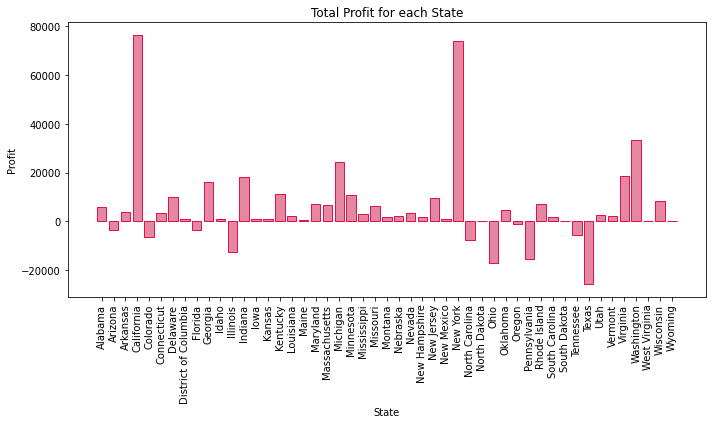

In [ ]:
fig,ax = plt.subplots(figsize=(10,6))
ax.bar(prof_df['State'],prof_df['Profit'],color='#e687a2',edgecolor='#de124c') 
ax.set_title(label="Total Profit for each State", loc='center', pad=None)
ax.set_ylabel('Profit')
ax.set_xlabel('State')
ax.set_xticklabels(prof_df['State'],rotation=90)
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


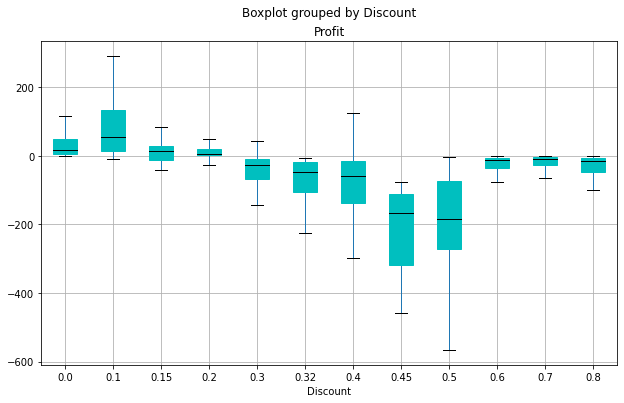

In [ ]:
props = dict(boxes="c", medians="Black", caps="black")
df.boxplot(by='Discount', column='Profit',showfliers=False,figsize=(10,6),patch_artist=True,color=props)


#Analysing Loss based on various factors

Analyzing states that faced loss find p/l for all items

In [ ]:
state_neg=prof_df.loc[prof_df.Profit < 0]
state_neg

,State,Profit
1,Arizona,-3427.9246
4,Colorado,-6527.8579
8,Florida,-3399.3017
11,Illinois,-12607.8870
31,North Carolina,-7490.9122
33,Ohio,-16971.3766
35,Oregon,-1190.4705
36,Pennsylvania,-15559.9603
40,Tennessee,-5341.6936
41,Texas,-25729.3563


visualised loss faced by various states

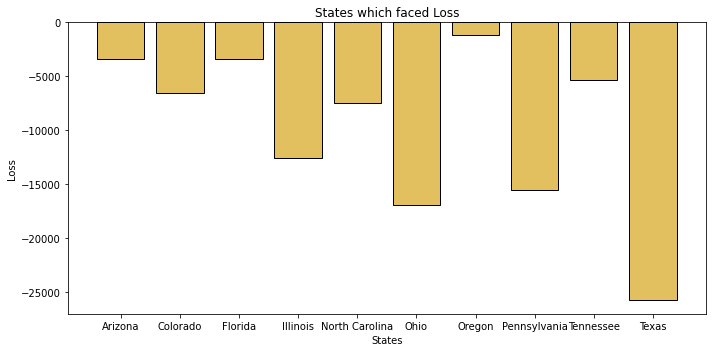

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))
def plot_state(ax):
    ax.bar(state_neg['State'],state_neg['Profit'],color='#e3c05f',edgecolor='black') 
#ax.legend(label, loc='upper center', fontsize='large',edgecolor='black', borderpad=1.0, shadow=True, handlelength=0)
    ax.set_title(label="States which faced Loss", loc='center', pad=None)
    ax.set_ylabel('Loss')
    ax.set_xlabel('States')
plot_state(ax)
plt.tight_layout()


count of losses faced by various states and visualise them based on their Region.

In [ ]:
state_neg2=df.loc[df.Profit < 0].reset_index(drop=True)
state_pos2=df.loc[df.Profit >= 0].reset_index(drop=True)
dft=state_neg2.groupby(['Region','State'], as_index=False)['Profit'].count()
dft=dft[dft.Profit > 40]
dft

,Region,State,Profit
0,Central,Illinois,255
1,Central,Texas,486
8,East,New York,47
9,East,Ohio,209
10,East,Pennsylvania,278
13,South,Florida,126
14,South,North Carolina,68
15,South,Tennessee,65
16,West,Arizona,85
17,West,California,105


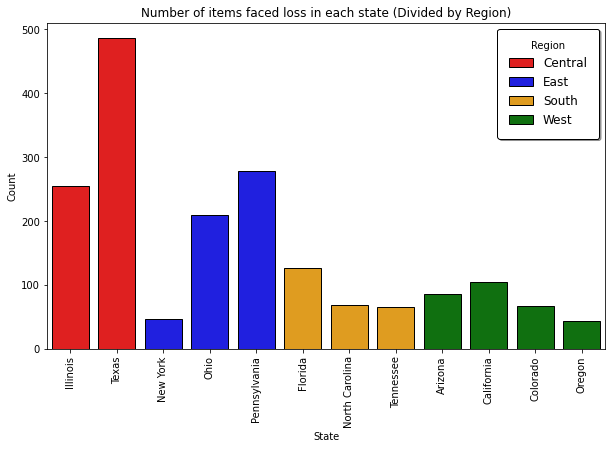

<Figure size 432x288 with 0 Axes>

In [ ]:
fig,ax = plt.subplots(figsize=(10,6))
def plot_region(ax):
    d={'Central':'r','East':'b','South':'orange','West':'g'}
    dft['color'] = dft['Region'].map(d)
    sns.barplot(data=dft, x=dft.State, y='Profit', hue='Region', palette=d, dodge=False, edgecolor='black')
    ax.set_xticklabels(dft['State'],rotation=90)
    ax.set_title(label="Number of items faced loss in each state (Divided by Region)", loc='center', pad=None)
    ax.set_ylabel('Count')
    ax.set_xlabel('State')
    ax.legend(loc=1, fontsize='large',edgecolor='black', borderpad=1.0, title="Region", shadow=True)
    plt.show()
plot_region(ax)
plt.tight_layout()

total number of items belonging to each category which faced loss


In [ ]:

state_pos2['Discount'].value_counts().reindex(df.Discount.unique(), fill_value=0).sort_values()
state_neg2['Discount'].value_counts().reindex(df.Discount.unique(), fill_value=0)
state_pos2.head()

,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Henderson,Kentucky,South,Furniture,Bookcases,261.960,2,0.0,41.9136
1,Henderson,Kentucky,South,Furniture,Chairs,731.940,3,0.0,219.5820
2,Los Angeles,California,West,Office Supplies,Labels,14.620,2,0.0,6.8714
3,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.368,2,0.2,2.5164
4,Los Angeles,California,West,Furniture,Furnishings,48.860,7,0.0,14.1694


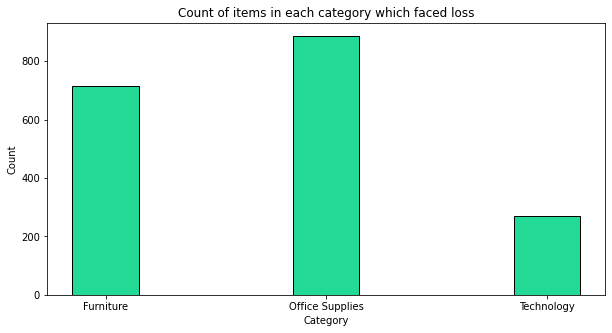

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))
def plot_cat(ax):
    dftn=state_neg2.groupby('Category', as_index=False)['Profit'].count()
    ax.bar(dftn['Category'],dftn['Profit'],color='#23D996',edgecolor='black',width=0.3)
    ax.set_title(label="Count of items in each category which faced loss", loc='center', pad=None)
    ax.set_ylabel('Count')
    ax.set_xlabel('Category')
plot_cat(ax)
plt.show()

effect of Profit and Discount on each Category

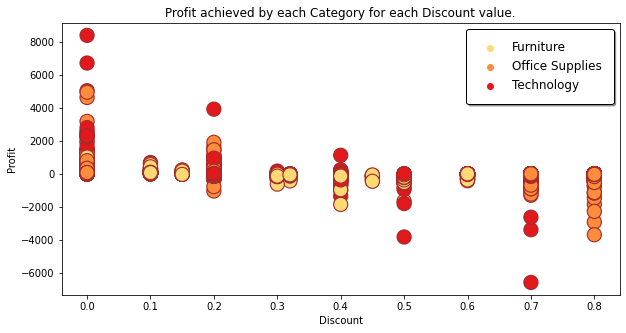

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))
def plot_disccat(ax):
    sns.scatterplot(x="Discount", y="Profit", data=df, hue="Category",ax=ax,s=200,palette='YlOrRd',edgecolor='brown')
    ax.legend(loc=1, fontsize='large',edgecolor='black', borderpad=1.0, shadow=True)
    ax.set_title('Profit achieved by each Category for each Discount value.')
plot_disccat(ax)
plt.show()

It can be seen that OFFICE SUPPLIES has faced maximum loss due to giving high discount (of 0.8) many times. Whereas other categories are profitable with low discounts.

find the count of discounts offered where the company faced profit and loss respectively.

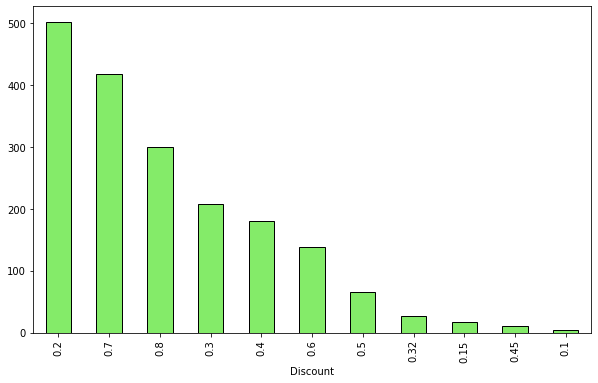

Text(3.1999999999999957, 0.5, 'Loss count')

In [ ]:
fig,((ax1)) = plt.subplots(nrows=1,figsize=(10,6))
def plot_disc(ax,x):
    x['Discount'].value_counts().plot(kind = 'bar',color='#84EB69',edgecolor='black',ax=ax)
    ax.set_xlabel('Discount')
    plt.show()
plot_disc(ax1,state_neg2)
ax1.set_ylabel('Loss count')

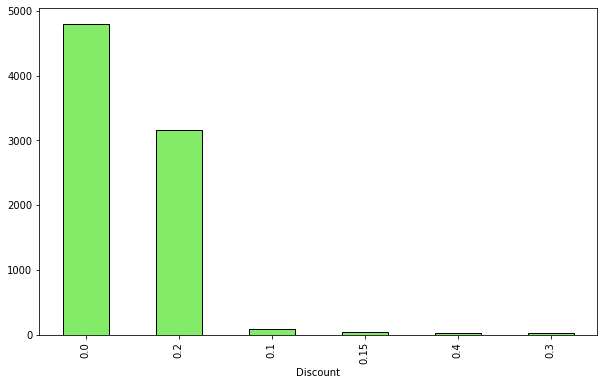

Text(3.200000000000003, 0.5, 'Profit count')

In [ ]:
fig,((ax2)) = plt.subplots(ncols=1,figsize=(10,6))
def plot_disc(ax,x):
    x['Discount'].value_counts().plot(kind = 'bar',color='#84EB69',edgecolor='black',ax=ax)
    ax.set_xlabel('Discount')
    plt.show()
plot_disc(ax2,state_pos2)
ax2.set_title(label="Count of discounts offered where\n store faced Profit", loc='center', pad=None)
ax2.set_ylabel('Profit count')

As seen in the graphs we can conclude that we neeed to work on states like Texas, Ohio, Pennsylvania, Illinois and also on Office Supplies Category.
Giving discount of 0.2 yields maximum times Loss(500). But the profit count of it is exeptionally high (nearly 3000) too. Also for discounts < 0.2 loss count is low.
Hence it can be concluded that giving high discounts can lead to Loss.

#Solutions:
1. Giving low discount ( < 15%) on Office Sales products.
2. Advertising and improvising sales in some Central and Eastern states like Texas and Ohio using low discount, great deals etc.